### Exploratory Data Analysis of Activities of Daily Living (ADLs) Recognition Using Binary Sensors Data Set

This dataset comprises information regarding the ADLs performed by two users on a daily basis in their  
own homes. This dataset is composed by two instances of data, each one corresponding to a different   
user and summing up to 35 days of fully labelled data. Each instance of the dataset is described by   
three text files, namely: description, sensors events (features), activities of the daily living (labels).   
Sensor events were recorded using a wireless sensor network and data were labelled manually.  

source:
    https://archive.ics.uci.edu/ml/datasets/Activities+of+Daily+Living+(ADLs)+Recognition+Using+Binary+Sensors

#### Description: 
Home setting: 4 rooms house  
Number of labelled days: 14 days  
Labels (ADLs included):
* Leaving  
* Toileting  
* Showering  
* Sleeping  
* Breakfast   
* Lunch  
* Dinner    
* Snack   
* Spare_Time/TV  
* Grooming 

Number of sensors: 12 sensors  
Sensors: 

PIR:
* Shower  
* Basin  
* Cooktop 

Magnetic: 
* Maindoor  
* Fridge  
* Cabinet  
* Cupboard   

Flush: 
* Toilet  

Pressure: 
* Seat 
* Bed

Electric: 
* Microwave 
* Toaster

In [1]:
#imports
import pprint
import pandas as pd
from pathlib import Path

### Read data and create a pandas dataframe

In [2]:
in_dir = Path(r"C:\Users\UCI ADL Binary Dataset")
file = 'OrdonezA_ADLs.txt'

with open(in_dir/file) as file:
    text = [line.split() for line in file.readlines() if line.split()]
    
col_list = ["start date","start time","end date","end time","activity"]
data_table = pd.DataFrame(text[2:], columns=col_list,)

#change data type
data_table.loc[:,"start date"] = pd.to_datetime(data_table.loc[:,"start date"])
data_table.loc[:,"start time"] = pd.to_datetime(data_table.loc[:,"start time"],format='%H:%M:%S')
data_table.loc[:,"end date"]   = pd.to_datetime(data_table.loc[:,"end date"])
data_table.loc[:,"end time"]   = pd.to_datetime(data_table.loc[:,"end time"], format='%H:%M:%S')
data_table.loc[:,"activity duration"]  = data_table['end time'] - data_table['start time']

print(data_table.info())

data_table.iloc[13:16]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   start date         248 non-null    datetime64[ns] 
 1   start time         248 non-null    datetime64[ns] 
 2   end date           248 non-null    datetime64[ns] 
 3   end time           248 non-null    datetime64[ns] 
 4   activity           248 non-null    object         
 5   activity duration  248 non-null    timedelta64[ns]
dtypes: datetime64[ns](4), object(1), timedelta64[ns](1)
memory usage: 11.8+ KB
None


,start date,start time,end date,end time,activity,activity duration
13,2011-11-28,1900-01-01 20:20:55,2011-11-28,1900-01-01 20:20:59,Snack,0 days 00:00:04
14,2011-11-28,1900-01-01 20:21:15,2011-11-29,1900-01-01 02:06:00,Spare_Time/TV,-1 days +05:44:45
15,2011-11-29,1900-01-01 02:16:00,2011-11-29,1900-01-01 11:31:00,Sleeping,0 days 09:15:00


### Transform data to split by day boundary

This notation doesn't allow us to group by day boundary.  
Instead of one row denoting two days, two rows thar are denoting two days should be created:  

14	11/28/2011	8:21:15 PM	11/29/2011	2:06:00 AM	Spare_Time/TV	05:44:45
### ⭢  
14	11/28/2011	8:21:15 PM	11/28/2011	12:00:00 AM	Spare_Time/TV	3:38  
15	11/29/2011	12:00:00 AM	11/29/2011	2:06:00 AM	Spare_Time/TV	2:06

In [3]:
# Apply day boundary split transformation

clean_adl_table = pd.DataFrame()

for row in data_table.iterrows():

    if row[1]["start date"] < row[1]["end date"]:
        row_1_dict = {"start date" : row[1]["start date"],
                      "start time" : row[1]["start time"],
                      "end date" : row[1]["start date"],
                      "end time" : pd.to_datetime('1900-01-01 00:00:00'),
                      "activity" : row[1]["activity"], 
                      "activity duration" : pd.to_datetime('1900-01-02 00:00:00') - row[1]["start time"]
                     }

        row_1 = pd.Series(row_1_dict)

        row_2_dict = {"start date" : row[1]["end date"],
                      "start time" : pd.to_datetime('1900-01-01 00:00:00'),
                      "end date" : row[1]["end date"],
                      "end time" : row[1]["end time"],
                      "activity" : row[1]["activity"], 
                      "activity duration" : row[1]["end time"] - pd.to_datetime('1900-01-01 00:00:00')
                     }
        row_1 = pd.Series(row_1_dict)
        row_2 = pd.Series(row_2_dict)
        clean_adl_table = pd.concat([clean_adl_table, row_1.to_frame().T], 
                                    ignore_index=True)
        clean_adl_table = pd.concat([clean_adl_table, row_2.to_frame().T], 
                                    ignore_index=True)
        
    else:
        clean_adl_table = pd.concat([clean_adl_table,pd.Series(row[1]).to_frame().T], 
                                    ignore_index=True)
        
clean_adl_table['day name'] = clean_adl_table['start date'].dt.strftime("%A")
    
print("Check row 14 and 15:")
clean_adl_table.iloc[13:17]

Check row 14 and 15:


,start date,start time,end date,end time,activity,activity duration,day name
13,2011-11-28,1900-01-01 20:20:55,2011-11-28,1900-01-01 20:20:59,Snack,0 days 00:00:04,Monday
14,2011-11-28,1900-01-01 20:21:15,2011-11-28,1900-01-01 00:00:00,Spare_Time/TV,0 days 03:38:45,Monday
15,2011-11-29,1900-01-01 00:00:00,2011-11-29,1900-01-01 02:06:00,Spare_Time/TV,0 days 02:06:00,Tuesday
16,2011-11-29,1900-01-01 02:16:00,2011-11-29,1900-01-01 11:31:00,Sleeping,0 days 09:15:00,Tuesday


### Check for outliers

#### Check minimum activity duration 

In [4]:
clean_adl_table.sort_values('activity duration').head()

,start date,start time,end date,end time,activity,activity duration,day name
72,2011-12-01,1900-01-01 19:28:51,2011-12-01,1900-01-01 16:29:59,Toileting,-1 days +21:01:08,Thursday
82,2011-12-02,1900-01-01 12:20:41,2011-12-01,1900-01-01 10:20:59,Grooming,-1 days +22:00:18,Friday
84,2011-12-02,1900-01-01 12:27:47,2011-12-01,1900-01-01 11:35:49,Breakfast,-1 days +23:08:02,Friday
228,2011-12-09,1900-01-01 17:59:25,2011-12-09,1900-01-01 17:59:27,Grooming,0 days 00:00:02,Friday
51,2011-11-30,1900-01-01 18:01:44,2011-11-30,1900-01-01 18:01:47,Toileting,0 days 00:00:03,Wednesday


Let's check the top 3 rows:  
2	2011-12-01	1900-01-01 19:28:51	2011-12-01	1900-01-01 16:29:59	Toileting	-1 days +21:01:08  
82	2011-12-02	1900-01-01 12:20:41	2011-12-01	1900-01-01 10:20:59	Grooming	-1 days +22:00:18  
84	2011-12-02	1900-01-01 12:27:47	2011-12-01	1900-01-01 11:35:49	Breakfast	-1 days +23:08:02  

The first case shows an activity that begins 2011-12-01 19:28:51 and ends a few hours earlyer at 16:29:59 on the same day.  
Following two rows contain cases where the activity ends on previous day.  
Best way is to leave these out as the real interval of the activity is uncertain.

In [5]:
#leave out the first 3 rows
clean_adl_table = clean_adl_table.sort_values('activity duration')[3:]

#### Check maximum activity duration 

In [6]:
clean_adl_table.sort_values('activity duration').tail()

,start date,start time,end date,end time,activity,activity duration,day name
201,2011-12-08,1900-01-01 01:39:41,2011-12-08,1900-01-01 11:14:29,Sleeping,0 days 09:34:48,Thursday
177,2011-12-07,1900-01-01 00:59:56,2011-12-07,1900-01-01 10:45:40,Sleeping,0 days 09:45:44,Wednesday
80,2011-12-02,1900-01-01 02:15:55,2011-12-02,1900-01-01 12:15:19,Sleeping,0 days 09:59:24,Friday
97,2011-12-03,1900-01-01 01:47:02,2011-12-03,1900-01-01 11:56:20,Sleeping,0 days 10:09:18,Saturday
131,2011-12-05,1900-01-01 01:35:10,2011-12-05,1900-01-01 11:48:55,Sleeping,0 days 10:13:45,Monday


The most longest activity is Sleeping with 10:13 as top value. Well, at least this seems to be realistic. 

### Total count of activities by activity type
The total timeframe is 14 days

,activity
Spare_Time/TV,89
Grooming,50
Toileting,43
Leaving,15
Showering,14
Sleeping,14
Breakfast,13
Snack,11
Lunch,9


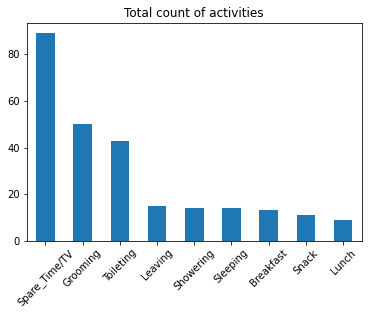

In [7]:
clean_adl_table['activity'].value_counts().plot(kind='bar', title='Total count of activities', rot=45)
pd.DataFrame(clean_adl_table['activity'].value_counts())

### Measured VS not measured activity 

In [8]:
sum_of_daily_breakdown = clean_adl_table.loc[:,["start date","activity duration"]].groupby(["start date"]).sum()
sum_of_daily_breakdown["not measured activity duration"] = pd.Timedelta('24:00:00') - sum_of_daily_breakdown.loc[:,"activity duration"]
sum_of_daily_breakdown["activity duration"] = sum_of_daily_breakdown["activity duration"].dt.floor("10min")
sum_of_daily_breakdown["not measured activity duration"] = sum_of_daily_breakdown["not measured activity duration"].dt.floor("10min")

sum_of_daily_breakdown

,activity duration,not measured activity duration
start date,,
2011-11-28,0 days 21:00:00,0 days 02:50:00
2011-11-29,0 days 21:30:00,0 days 02:20:00
2011-11-30,0 days 22:40:00,0 days 01:10:00
2011-12-01,0 days 22:30:00,0 days 01:20:00
2011-12-02,0 days 23:30:00,0 days 00:20:00
2011-12-03,0 days 23:20:00,0 days 00:30:00
2011-12-04,0 days 23:00:00,0 days 00:50:00
2011-12-05,0 days 21:40:00,0 days 02:10:00
2011-12-06,0 days 22:10:00,0 days 01:40:00


In [9]:
print("Arevage daily duration of not measured activity:")
print(sum_of_daily_breakdown['not measured activity duration'].mean().floor("10 min"))
print()
print("Sum of duration of not measured activity:")
print(sum_of_daily_breakdown['not measured activity duration'].sum())

Arevage daily duration of not measured activity:
0 days 01:20:00

Sum of duration of not measured activity:
0 days 20:50:00


### Summed up duration of activities by date

In [10]:
activity_breakdown = clean_adl_table.loc[:,["start date","activity duration","activity"]].groupby(["start date","activity"]).sum()
activity_breakdown.sort_values(by=['start date','activity duration'], inplace=True)
activity_breakdown

activity duration
start date activity                       
2011-11-28 Snack           0 days 00:00:04
           Grooming        0 days 00:02:55
           Toileting       0 days 00:07:08
           Showering       0 days 00:07:16
           Breakfast       0 days 00:08:37
...                                    ...
2011-12-11 Showering       0 days 00:15:46
           Lunch           0 days 00:52:05
           Leaving         0 days 00:56:05
           Spare_Time/TV   0 days 09:16:14
           Sleeping        0 days 09:26:19

[112 rows x 1 columns]

### Average duration of activities 

In [11]:
activity_mean_dict = {}
for activity in clean_adl_table['activity'].unique():
    df = clean_adl_table[clean_adl_table['activity'] == activity]
    activity_mean_dict[activity] = [df['activity duration'].mean()]
    
ada_df = pd.DataFrame.from_dict(activity_mean_dict, orient='index', columns=["Average duration of activity"])
ada_df["Average duration of activity"] = ada_df["Average duration of activity"].dt.floor("1 min")
ada_df

,Average duration of activity
Grooming,0 days 00:02:00
Toileting,0 days 00:03:00
Snack,0 days 00:00:00
Showering,0 days 00:06:00
Spare_Time/TV,0 days 01:36:00
Breakfast,0 days 00:08:00
Leaving,0 days 01:50:00
Lunch,0 days 00:34:00
Sleeping,0 days 09:21:00
